#Unsupervised Learning

## Antonio Luna García de la Infanta (antonio.luna@gmail.com)

Cuando no existe una variable de salida definida, es decir, en un ejemplo normal, tenemos que cada combinación de X tiene un Y en unsupervised learning, no existe ese Y (que es lo que se utilizaría par comparar) - Basicamente el ML necesita de ejemplos para "aprender", es decir la muestra de train que hace que el modelo aprenda y cree los parametros del modelo y que luego se aplique en el test, para comprobar que funciona.

While in supervised learning there is a response variable $Y$ associated to a set of predictors $X_1, X_2, ..., X_p$ for $p$ features, in unsupervised learning we do not have the $Y$. There will be just the set of $p$ features in our data **without any response $Y$**, and we will try to make **subgroups** of data or extract meaningful information from the features. It is usually part of an **exploratory data analysis**.

The **absence of labels** in unsupervised learning, makes it much more difficult to assess the quality of the model, because there are no references: there will be no train-test nor validation sets.

We will see methods to extract this meaningful information, such us **PCA**, and **Clustering** to form subgroups of data whose features have a certain metric of proximity among them.

There are many real problems where we have the data without labels. For example in a marketing campaign, a firm may be interested in making groups from their clients, to offer different products to the clients of each group. The clients in the same group should have some properties in common, even if these properties are hidden in the data and are not trivially visible. Once the groups are formed, the marketing strategy can be defined to target each of the groups differently.

## PCA

Para reducir el numero de datos al minimo, pero que aporten la maxima información posible, es decir que expliquen la maxima varianza posible.

Básicamente se eliminarián los autovalores que aportan menos información.

**PCA (Principal Component Analysis)** is a dimensionality reduction technique, to present the data in the directions where it is **highly variable**. These directions or dimensions of the principal components are lines and subspaces where the data lies **as close as possible** to them, and its variation is the highest, to show the maximum information captured by that component. This provides a **good summary** of the data.

<br>

*With PCA we aim to find a low-dimensional representation of the data that captures as much of the information as possible. PCA seeks a small number of dimensions that are as interesing as possible, measured by the amount that the observations vary along each dimensions.* 

The first principal component of a set of features $X_1, X_2, ..., X_p$ is the normalized linear combination of the features that has the largest variance.

<br>

$$Z_1 = \phi_{11}X_1 + \phi_{21}X_2+...+\phi_{p1}X_p $$
$$\sum_{j=1}^p \phi_{j1}^2 = 1$$
.

This defines the principal component **loading vector**:

$$ \phi_1 = (\phi_{11} \, \phi_{21} \, ... \, \phi_{p1})^T $$

For the Principal Component N.1, we look for the linear combination with the highest variance, under the constraint $\sum_{j=1}^p \phi_{j1}^2 = 1$:

$$z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2}+...+\phi_{p1}x_{ip} $$

<br>
It can be solved with **Eigen decomposition**

With $n$ samples of $p$ features, the **scores** of the first principal component will be $z_{11}, ..., z_{n1}$

The loading vector $\phi_1$ with elements $\phi_{11} \, \phi_{21} \, ... \, \phi_{p1}$ defines a direction in feature space along which the data vary the most. If we project the *n* data points $x_1, ..., x_n$ onto this direction, the projected values are the principal component scores $z_{11}, ..., z_{n1}$ themselves.

<br>
[ref: Introduction to statistical learning: http://www-bcf.usc.edu/~gareth/ISL/]

PCA is also used for data preprocessing, for example to extract meaningful features to feed a learning algorithm more efficiently, rather than using the whole $p$ features when that number $p$ is very large.

** 3BLUE1BROWN**
Eigenvectors and eigenvalues | Essence of linear algebra, chapter 14

https://www.youtube.com/watch?v=PFDu9oVAE-g&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=15&t=0s

### Dataset of swap rates

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

# Create proper environment
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [58]:
import sys
UNSUPERVISED_LEARNING_PATH = 'drive/My Drive/MEFC - BBVA/T8 - Machine Learning/Unsupervised Learning/'

sys.path.append(UNSUPERVISED_LEARNING_PATH)

df_Sw6m = pd.read_csv(UNSUPERVISED_LEARNING_PATH + 'SWAP_vs_6M.csv', parse_dates = True, dayfirst = True)

FileNotFoundError: ignored

In [0]:
print(UNSUPERVISED_LEARNING_PATH + 'SWAP_vs_6M.csv')

In [0]:
# Transform date column to ISO format (using the date only)
import datetime as dt

df_Sw6m['date'] = pd.to_datetime(df_Sw6m['date'], dayfirst = True)


In [0]:
df_Sw6m.set_index('date', inplace=True)

In [0]:
df_Sw6m.head() # Tipos par swap a distintos tenors

In [0]:
# Plotting the covariances, we see that we must drop the last three columns.
# Also because there are plenty of NaN on those columns for large tenors.
# The first column for the EUR6M will be dropped, too
plt.imshow(df_Sw6m.cov())

In [0]:
# Dropping columns 40y, 50y, 60y because there are NaN on the first years
df_Sw6m.drop(columns=['EUR6M','SWAP_40y', 'SWAP_50y', 'SWAP_60y'], inplace=True)

# We will diff later with .diff, much easier, but here is another
# possibility of coding it, substructing a displaced dataframe

# As of date t we will have the increment rate(t) - rate(t-1)
# We will substract a displaced dataframe to have the differences
# df_current_day = df_Sw6m.loc[1:df_Sw6m.shape[0]].copy().reset_index(drop = True)
# df_prev_day = df_Sw6m.loc[0:df_Sw6m.shape[0]-2].copy().reset_index(drop = True)
# df_diff = df_current_day - df_prev_day

# Showing NaN, if any
# df_na = df_diff[df_diff.isna().any(axis=1)]
# df_na

In [0]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

X = df_Sw6m['2006':'2018'].diff()[1:] # Seleccionamos del 2006 al 2018, y la diff hace la diferencia entre x y x-1 por lo tanto tendrá una fila menos

X = StandardScaler().fit_transform(X)

ncomp = 10
pca = decomposition.PCA(n_components = ncomp) # haremos la descomposición en PCA 

pca.fit(X)

Xpca = pca.transform(X)


Before plotting the principal components, we will revisit our data, the original dataframe with the swap rates in percentage, and the dataframe of differences normalized:

In [0]:
print('The shape of our swap rates dataframe from 2006 to 2018 is: ', df_Sw6m['2006':'2018'].shape)
df_Sw6m.head()

And we will confirm that the shape of the differences dataframe has one row less, and as number of columns, the same number of swap rates columns:

In [0]:
print('Shape of the differences dataframe: ', X.shape)

In [0]:
print('Shape of the reduced dimension dataset to the number of principal components: ',  Xpca.shape)

Now we will plot the **loading vector** for each principal component $i$, to transform our data with $p$ features

$$ \phi_i = (\phi_{1i} \, \phi_{2i} \, ... \, \phi_{pi})^T $$

El loading vector tiene


Let's say we choose to represent our data through **the first $k$ principal components**. Out data matrix, with $n$ samples and $p$ features $D_{n \times p}$, can be transformed reducing its dimensionality to a smaller matrix $D_{n \times k}$, multiplying it by a concatenation of the loading vectors corresponding to these first $k$ principal components:

$\begin{bmatrix}
x_{11} & x_{12}  & \cdots & x_{1p}\\
x_{21} & x_{22} & \cdots & x_{2p}\\
\vdots       & \vdots      & \ddots & \vdots\\
x_{n1} & x_{n2} & ... & x_{np}
\end{bmatrix}
\begin{bmatrix}
\phi_{11} & \phi_{12}  & \cdots & \phi_{1k}\\
\phi_{21} & \phi_{22} & \cdots & \phi_{2k}\\
\vdots       & \vdots      & \ddots & \vdots\\
\phi_{p1} & \phi_{p2} & ... & \phi_{pk}\\
\end{bmatrix} =
\begin{bmatrix}
x_{11} & x_{12}  & \cdots & x_{1k}\\
x_{21} & x_{22} & \cdots & x_{2k}\\
\vdots       & \vdots      & \ddots & \vdots\\
x_{n1} & x_{n2} & ... & x_{nk}
\end{bmatrix}
$

### PCA representation of swap rate movements 

In [0]:
# fig, ax = plt.subplots(nrows = ncomp, ncols = 1, figsize=(10,20))

fig = plt.figure()
fig.set_figheight(40)
fig.set_figwidth(12)

# locs, labels = xticks()
xlabels = list(df_Sw6m.columns)
xlabels = [label.replace('SWAP_', '') for label in xlabels]

# Esto es el loading vector - vector de la componente principal (autovector)
# Representan los movimientos de la curva, es decir, curvatura, inversion, movimiento paralelo, pendiente - que van a generar la curva vinal
for i in range(0, Xpca.shape[1]):
    plt.subplot(ncomp + 1, 1, i + 1)
    plt.plot(pca.components_[i])
    plt.xlabel('PCA component N. ' + str(i+1))
    plt.xticks(range(len(xlabels)), xlabels)
    plt.gcf().subplots_adjust(bottom=0.1) # make room for x-axis labels


### Percentage of variance explained

In [0]:
list(pca.explained_variance_ratio_)[0:10]

# Esto enseña que la primera componente explica el 88.3% de la evolución de la curva de los par swap (en este caso es una subida o bajada de la curva de tipos)

In [0]:
print("Variance explained by the 2 first components: ", sum(list(pca.explained_variance_ratio_)[0:2]))
print("Variance explained by the 3 first components: ", sum(list(pca.explained_variance_ratio_)[0:3]))
print("Remaining variance explained by the rest:     ", sum(list(pca.explained_variance_ratio_)[3:]))


In [0]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Percentage of variance explained')
plt.xlabel('Principal component')

In [0]:
pca = decomposition.PCA(n_components = 2)

pca.fit(X)

pca_repre = pca.transform(X)


### Representation of PCA components

The information on the first component is ortogonal and **independent** of the information of the second component. Therefore, if we plot one against the other, the plot should be a cloud of points centered and with a certain standard deviation each of them, but **clearly uncorrelated**.

In [0]:
plt.plot(pca_repre[:,0],pca_repre[:,1],'.')

# Las componentes principales son ortogonales, es decir la correlación deberia ser cero, y por lo tanto, el plot tiene que ser una nuve de puntos sin corr
# Se puede ver en este grafico que la primera componente principal (eje x) explica mucha mas variabilidad (-20,20), por eso explica el 88.3


As we see in this cloud of points, the **dispersion** of the data along the horizontal axis, corresponding to the first principal component, is greater than the dispersion of the data on the second component, the vertical axis. Aproximately three times greater dispersion on the first component, as we can check numerically:

In [0]:
print('Standard deviation of the 1st component: ', np.std(pca_repre[:,0]))
print('Standard deviation of the 2nd component: ', np.std(pca_repre[:,1]))

We can try to compare the **projections on the first two principal components** with the original data, although taking into account that there has been a reduction of dimensions, so the comparison is not straighforward.

In [0]:
print('Dimensions of the standard-scaled original data:  ', X.shape)
print('Dimensions of the PCA representation of the data: ', pca_repre.shape)

In [0]:
plt.scatter(X[:, 0], X[:, 1])

In [0]:
def plot2D_PCA(icomp1, icomp2, X):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component' + str(icomp1), fontsize = 15)
    ax.set_ylabel('Principal Component' + str(icomp2), fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)

    # Indexes begin with 0, so for principal component #1 corresponds 0
    ax.scatter(X[:, icomp1 - 1], X[:, icomp2 - 1])
    ax.grid()
 

In [0]:
plot2D_PCA(1, 2, pca_repre)

## K-means

K-means is a clustering method that determines K subgroups from the data, assigning one (and only one) group to each sample, given a number K of groups. Each of the groups gather samples that are homogeneous: these groups form K distinct, non-overlapping clusters. The following two properties must hold:

 * Each observation belongs to at least one of the K clusters:
 * The clusters are non-overlapping
  
####K as an input
This is very important to point out: the number **K** must be set as an user input in the model, so this is a very important decision to make from the beginning.

The algorithm seeks to minimize the variation inside each cluster. If we have $C_1, ... C_k$ clusters, for a $i$th observation belonging to the $k$th cluster, we can express this as $i \in C_k$.

Then, to minimize the variation among samples in each cluster, we seek to minimize the *squared Euclidian distance* :

$$W(C_k)=\frac{1}{\mid Ck \mid}\sum_{i,i`\in C_k} \sum_{j=1}^{p}(x_{ij}-x_{i`j})^2$$

where $\mid C_k \mid$ is the number of observations in cluster $C_k$

[ref: http://www-bcf.usc.edu/~gareth/ISL ]

To solve this, we can implement an algorihm that seeks a *local minimum* with these steps:

 1. Randomly assign a number of cluster from 1..K to each sample.
 2. Iterate until no sample changes from one group to another:
     * 2.1 Calculate the centroid for each cluster with the mean for each feature $p$
     * 2.2 Change assignments for each sample to their closest centroid.

This algorithm is guaranteed to converge, and with each iteration, it can only improve in successfully minimizing the within-cluster variation.

The starting point in K-means is important, because it finds a **local minimum**, not a global one. Different realizations of the algorithm with different starting points for the centroids initial-guess (as a result of having randomly assigned a number of cluster to each sample, to calculate where the centroid lies) , will result in different final centroids.


[Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html ]


We will use a dataset with the S&P 500 data since year 2000. There are many missing values, because companies here entered and left the index during the whole timespan available. We have to address these missing values somehow, and we will do it this way:

 * By columns, dropping those columns with a low percentage of valid data
 * By rows, dropping those rows with NaN on early years.


### S&P 500 dataset

In [0]:
df_spx = pd.read_csv(UNSUPERVISED_LEARNING_PATH + 'SPX_2019-05-24.csv', sep=';', parse_dates = True, dayfirst = True)

In [0]:
df_spx['Date'] = pd.to_datetime(df_spx['Date'], dayfirst = True)
df_spx.set_index('Date', inplace=True)
initial_nb_cols = df_spx.shape[1]
df_spx.shape

In [0]:
df_spx.head(5)

# Filas - Fecha
# Columna - Acción

In [0]:
# https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
df_names = pd.read_csv(UNSUPERVISED_LEARNING_PATH + 'SP_names.csv', sep=';')

In [0]:
df_names.head()

In [0]:
df_names_dict = df_names.drop(['GICS Sector', 'GICS Sub Industry'], axis = 1)

In [0]:
rename_dict = df_names_dict.set_index('Symbol').to_dict()['Security']

The dataset has many S&P names (columns) that do not have data for several years. There are many companies that only have stock quotations from some point in the time onwards. We will identify those names and remove them. Our aim is to have a dataset with full time series for each name.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_spx.isnull(), cbar=False, ax=ax)

Lo blanco son datos vacios, vamos a eliminar las columnas que tengan mucho espacio en blanco, para evitar meter nombres que no tengan datos.

In [0]:
# Dropping those columns with majority of NaN
# The threshold is the number of non-NA values.
# Removing those columns with less than 40% of valid data
df_spx.dropna(thresh=int(0.40*len(df_spx)), axis=1, inplace = True)

In [0]:
print('Number of names dropped: ', initial_nb_cols - df_spx.shape[1])
print('New shape of dataframe: ', df_spx.shape)

Se han quitado 56 nombres

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_spx.isnull(), cbar=False, ax=ax)

Por lo tanto, podemos ver que todas las columnas que nos quedan tienen datos a partir del 2011, por lo tanto, haremos un corte a partir de esa fecha

Now we can select a date from which all names have quotations available, and discard all previous rows for earlier time when there are plenty of missing values. We can also remove those rows with missing values directly, because we can see that from some point in time onwards, there a no missing values any more.

In [0]:
df_spx.dropna(inplace=True)

In [0]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df_spx.isnull(), cbar=False, ax=ax)

Ya no hay columnas sin datos

In [0]:
print('Number of days of our temporal series:', df_spx.shape[0])
print('Number of S&P names with temporal series:', df_spx.shape[1])

Vamos a agrupar en función de la evolución de la acción, es decir, buscando grupos que hayan tenido el mismo comportamiento

In [0]:
df_pct = df_spx.pct_change()[1:] # Definimos la evolución, porcentaje de incremento, perdemos una fila

In [0]:
print('Number of days for the series: ', df_pct.shape[0])
print('Number of SPX names: ', df_pct.shape[1])

In [0]:
df_pct.head(3)

We can plot how these names look in a graph with the mean of their percentage daily increments against their standard deviation.

In [0]:
std_series = df_pct.std() 

In [0]:
mean_series = df_pct.mean()

In [0]:
plt.scatter(mean_series, std_series)
plt.ylim(0.008, 0.03)
plt.xlim(-0.001, 0.0022)

It is not very promising to seggregate any groups of names from this representation.

Vamos a utilizar como predictores la evolución diaria (las columans) es decir, tendremos 2000 dimensiones y como valores los 500

Es decir, estamos comparando las series historicas de cada valor

### PCA on historical series


We would like to make groups depending on the **historical series** of each name. Since two very similar and correlated series should be close to each other in the same K-means cluster, when the **K-means is performed in a $n_d$ (around 2000 days) dimensional space, one dimension for each day in the series**.

Once we have done the aggrupation in such a huge dimensional space, because we want to aggregate after the similarity of their temporal series, to be able to represent visually the aggregation in different clusters,  we will use the first 2 principal components with a PCA decomposition of the total $n_d$ number of days.

In [0]:
X = df_pct
X = StandardScaler().fit_transform(X) # Estandarizamos (quitando media y restando sd)

In [0]:
pd.DataFrame(X).head(3)

print(pd.DataFrame(X).shape)

In [0]:
pd.DataFrame(X).T.head(3) # Aqui tenemos las evoluciones de cada una de las 500 compañias

print(pd.DataFrame(X).T.shape)

In [0]:
# pca = decomposition.PCA(n_components = ncomp)
pca = decomposition.PCA() # Preparamos el model de PCA

pca.fit(X.T) # Aplicamos el PCA a la serie transformada

pca_repre = pca.transform(X.T)

In [0]:
pca_repre.shape

In [0]:
# for comp1 in range(1,11):
#   for comp2 in range(1, comp1 + 1):
#     if (comp1 != comp2):
#       plot2D_PCA(comp1, comp2, pca_repre)

In [0]:
plot2D_PCA(1, 2, pca_repre)

In [59]:
print('Number of rows of X, the number of days: ', X.shape[0])
print('Number of columns of X, the number of S&P names we use: ', X.shape[1])

Number of rows of X, the number of days:  2005
Number of columns of X, the number of S&P names we use:  449


In [0]:
# We need a dataframe transposed, where the S&P names will be our samples, 
# and the columns will be each of the days, the temporal series for each name
# Because we want to aggregate S&P names by the similarity in their stock series
df_norm_series = pd.DataFrame(data = X.T,
                              index = df_pct.columns,
                              columns = range(0, X.shape[0]))

In [62]:
df_norm_series.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
LYB,-1.735324,-1.921014,-4.868450,-2.035726,1.232077,0.958204,1.050674,-3.325334,-2.193369,-4.490854,-0.759193,3.911923,0.396739,2.627232,-1.735354,1.434733,1.532696,1.201915,-1.229218,2.134976,-1.794710,0.057697,-2.607241,0.876337,7.048612,2.220835,-2.682897,1.720218,3.079347,1.411374,-2.578482,-1.257325,1.794606,1.975313,0.816446,-0.373087,0.193602,-1.383674,1.548419,1.502947,...,1.927882,1.306223,0.692941,0.919211,-0.698064,0.121530,-0.669237,-0.445762,0.530128,1.014464,-0.077551,-0.065986,-0.274827,-0.019519,-0.036999,0.079496,-0.025374,-0.862131,-1.176061,-0.428971,0.619090,-0.553106,-1.103513,-0.352336,0.622297,-1.149063,-1.266803,-0.203977,-0.687676,0.406479,-1.822187,0.377875,0.109081,0.664921,-1.115451,-0.230447,1.114516,-0.646493,-1.362854,-0.111775
AXP,-2.276200,0.903345,-1.682892,-2.622036,-0.340433,1.819957,-0.825513,-0.982310,0.311442,-3.071996,-2.501510,-0.129489,-0.075828,1.788842,-1.791790,3.580142,0.490887,2.120145,-1.198456,-0.426377,-1.694563,2.651040,-0.957037,0.061250,3.785091,2.304955,-0.819559,1.582186,2.443874,0.019817,-2.250972,-2.546254,2.073049,2.063602,-0.793010,0.066469,0.096697,-3.269118,-0.229782,1.989469,...,1.669059,-0.527746,-0.348511,-0.349739,0.553726,-0.222361,-0.637616,0.179661,-0.259013,0.711064,-0.306655,0.910654,-0.123467,1.290191,-0.039985,-0.957517,1.096360,-0.005839,1.229695,1.115282,-0.595933,0.273319,-0.179411,0.112993,1.354034,-0.046506,-0.770441,-0.520596,-0.192351,0.756529,-1.722002,0.705436,0.392382,1.402097,-0.540078,0.463342,0.421140,-0.388634,-1.064697,0.268901
AVGO,1.103476,-1.418890,-0.520528,-2.800257,1.131279,-1.050878,0.505194,-2.175131,0.180192,-0.653581,-1.383226,0.637073,0.352893,0.455348,-0.163625,1.111097,-0.542361,0.414647,0.542049,2.315819,-0.942982,1.038351,-1.723881,-0.984542,-0.262045,2.141798,-1.328421,-1.018288,-0.073456,-0.307195,0.205429,-1.183364,-0.656645,2.558323,0.012977,0.228046,0.155077,-2.188907,-0.236949,1.698777,...,0.774292,-0.500760,0.128297,-0.415523,0.313481,-0.026436,-0.225686,0.600995,0.245866,1.155725,-0.156856,0.268479,0.255481,-0.352732,-0.058852,-0.619177,0.041349,-0.263536,-0.452667,-0.281860,0.308160,0.836919,0.018594,-0.535174,-0.076030,-0.705572,-0.736326,-0.684775,0.050060,-0.075072,-1.775470,1.390190,0.328179,-1.206043,-1.286449,-3.002035,0.436878,-1.153292,-1.731359,0.784950
BA,-1.357034,-0.697005,-2.808698,-2.652909,0.857737,2.817808,0.786604,-1.005980,0.433118,-2.112681,-2.629341,0.983024,0.885998,1.674309,0.302714,2.399573,-0.130034,0.309833,-0.908767,0.323238,-2.332566,1.811924,-0.455036,-0.740036,2.240937,0.104316,-1.157585,2.993542,0.893339,0.625866,-2.462102,-2.799188,1.270781,1.842119,-0.470147,0.445429,0.307044,-2.228396,0.232024,2.147092,...,1.755455,-0.204207,-1.121435,1.918144,-0.747150,-3.114758,-1.070051,-0.828292,0.916084,1.692177,-0.821464,1.078701,-0.820942,0.397917,-0.065715,-0.950639,-0.276114,0.198551,1.276140,-0.426126,-0.379359,-0.311987,-0.227459,-0.247879,0.054833,-0.951831,-2.720042,0.418486,-1.137997,0.038951,-3.413789,1.087871,0.454523,1.556735,0.169026,-0.496862,1.093872,-1.207951,-0.499600,1.790515
CAT,-0.957995,-0.708430,-3.207786,-4.287367,-0.052696,2.492312,0.642839,-2.087854,0.237034,-1.294606,-2.783276,1.730790,1.451874,2.345117,-1.282574,2.946426,1.180408,0.780780,-0.216545,1.999561,-1.915157,2.416140,-0.868553,0.500590,2.285410,3.090245,-1.290030,1.140346,3.205756,0.315772,-1.550053,-1.877766,1.544870,1.341311,-0.187137,-0.498626,0.562083,-2.768748,0.359990,2.625243,...,2.160392,-0.045657,-0.430669,0.368455,0.082709,-0.257793,-1.558756,0.517774,0.585341,1.021777,-0.436512,0.768248,0.291009,0.250350,-0.019117,-0.443206,-0.171620,-1.897340,-0.739810,1.302492,-0.023579,0.159385,-0.584233,

### K-means on  high-dimension space of the series, one dimension for each quote day

In [0]:
from sklearn.cluster import KMeans
num_K = 4
kmeans = KMeans(n_clusters=num_K).fit(df_norm_series)
y_kmeans = kmeans.predict(df_norm_series)


In [64]:
y_kmeans.shape

(449,)

In [65]:
y_kmeans

array([0, 2, 0, 0, 0, 2, 3, 1, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 1, 3, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 1,
       0, 1, 0, 3, 0, 0, 1, 3, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 1, 3, 0, 1, 0, 2, 0, 0, 3, 0, 3, 2, 0, 0, 1, 1,
       3, 0, 1, 2, 0, 2, 1, 0, 0, 1, 3, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 1, 0, 1, 0, 0, 0, 3, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2,

In [0]:
df_pca3C = pd.DataFrame(data  = pca_repre[0:,0:3],    # values
                      index = range(0,pca_repre.shape[0]),    # 1st column as index
                      columns=['Comp_1', 'Comp_2', 'Comp_3'])  # 1st row as the column names

In [0]:
df_pca3C['Name'] = df_pct.columns

In [0]:
df_pca3C['Fullname'] = df_pca3C.replace({'Name': rename_dict})['Name']

In [69]:
df_pca3C.head()

,Comp_1,Comp_2,Comp_3,Name,Fullname
0,-10.647869,8.718264,8.515641,LYB,LyondellBasell
1,-7.767846,0.992303,-7.787944,AXP,American Express Co
2,-5.009764,-8.923407,5.090507,AVGO,Broadcom Inc.
3,-4.818861,-0.312610,-2.092003,BA,Boeing Company
4,-11.848281,8.640939,5.423834,CAT,Caterpillar Inc.


In [70]:
df_pca3C['K_group'] = y_kmeans
df_pca3C.shape

(449, 6)

In [72]:
# We can get the centroids from the K-means
# Remember that these centroids belong to the
# 5000 - dimensional data for each day
centroids = kmeans.cluster_centers_
centroids.shape

(4, 2005)

In [73]:
# Transforming the centroids through the same PCA transformation to plot them
centroids_repre = pca.transform(centroids)
centroids_repre.shape

(4, 449)

### 2-D plot of K-means, proyected on 2-D PCA space

We will now plot the groups of the K-means, each sample depicted with the same colors as the rest of the samples in their group, in a projection on the PCA 2D space for the first two components.

**Important to notice!** this plot seems to mix samples of one colour with samples of another colour around the borders of the clusters. This is because we are **projecting** the K-means clusters onto a PCA 2-D space!

**Our K-means clustering has been made on the time series space, not on the PCA space** That is why the samples are not perfectly separated in clusters when the plot is done on PCA. The real clusters can not be depited because they have too many dimensions (more than 2000, one for each day!) This plot is the projection of the high-dimensional clusters onto a 2-D space, projecting on two principal components as dimensionality reduction to be able to render a visual representation.

The **centroid** of each cluster will be the **equally-weighted portfolio** of the S&P names belonging to that cluster, provided that all stocks had the same risk (the same variance), because we have previously normalized the returns. 

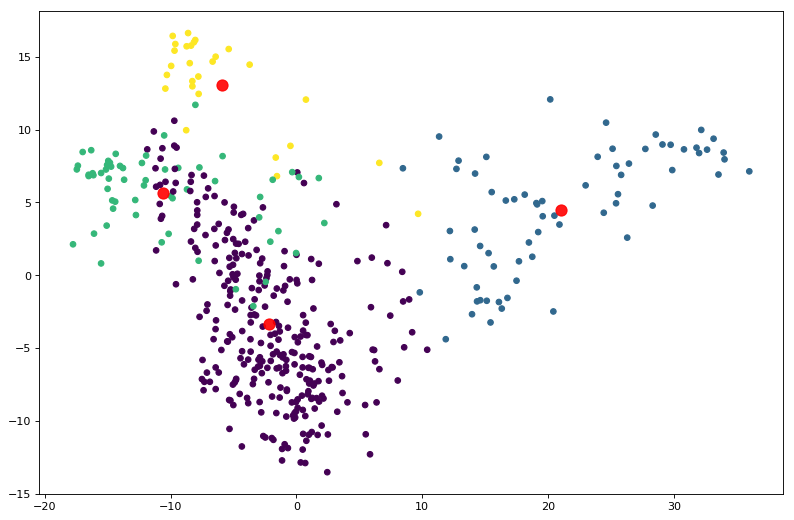

In [74]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(df_pca3C['Comp_1'], df_pca3C['Comp_2'], c=y_kmeans, s=25)
plt.scatter(centroids_repre[:, 0], centroids_repre[:, 1], c='red', s=100, alpha=0.9);

Esto es un k-means de 2000 dimensiones pintado sobre 2 dimensiones, el K mean se ha hecho sobre todas las series temporales, se han creado cuatro grupos, y se han agrupado las compañias

In [75]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)

enable_plotly_in_cell()
  
data = []
  
for k in range(0, num_K):
  
    # Create a trace for this cluster
    trace = go.Scatter(
      x = df_pca3C[df_pca3C['K_group'] == k]['Comp_1'],
      y = df_pca3C[df_pca3C['K_group'] == k]['Comp_2'],
      mode = 'markers',
      text = list(df_pca3C[df_pca3C['K_group'] == k]['Fullname'])
    )

    data.append(trace)

trace_centroids = go.Scatter(
      mode = 'markers',
      x = centroids_repre[:, 0],
      y = centroids_repre[:, 1],
      marker = dict(
          color = 'rgb(0, 0, 0)',
          size = 10)
  )

data.append(trace_centroids)
  
layout = dict(title = 'K-means for SPX time series, represented in 2 first principal components',
              xaxis = dict(title = 'PCA 1'),
              yaxis = dict(title = 'PCA 2'),
              width = 900,
              height = 700,
             )

fig = dict(data=data, layout=layout)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

Ha agrupado por rendimientos, lo que quiere decir, que al final las compañias que estan en el mismo sector, han tenido un comportamiento similar, razón por la cual, al agrupar por su rendimiento las tecnologicas han tenido un comportamiento similar y estan juntas

We can check very correlated names.

The two very close pointes far right correspond to two electric companies: WEC and DUK, which must be very correlated.

In [0]:
df_pca3C[df_pca3C['Name'].str.contains("AAPL")]

,Comp_1,Comp_2,Comp_3,Name,Fullname,K_group
224,-2.793914,-9.423004,6.542349,AAPL,Apple Inc.,0


In [0]:
df_pca3C[df_pca3C['Name'].str.contains("GOOGL")]

,Comp_1,Comp_2,Comp_3,Name,Fullname,K_group
359,-2.630848,-11.050986,2.074318,GOOGL,Alphabet Inc Class A,1


In [0]:
df_pca3C[df_pca3C['Name'].str.contains("AMZN")]

,Comp_1,Comp_2,Comp_3,Name,Fullname,K_group
321,-1.828549,-11.311004,5.797381,AMZN,Amazon.com Inc.,1


In [0]:
df_pca3C[df_pca3C['Name'].str.contains("NVDA")]

,Comp_1,Comp_2,Comp_3,Name,Fullname,K_group
342,-5.316347,-10.559753,4.903348,NVDA,Nvidia Corporation,0


In [0]:
df_pca3C[df_pca3C['Name'].str.contains("ADBE")]

,Comp_1,Comp_2,Comp_3,Name,Fullname,K_group
221,-2.470959,-11.149389,1.772461,ADBE,Adobe Systems Inc,0


### 3-D plot of K-means, proyected on 3-D PCA space

Repeating the representation, now projected onto 3 principal components

In [76]:
enable_plotly_in_cell()

data = []
  
for k in range(0, num_K):
  
    # Create a trace for this cluster
    trace = go.Scatter3d(
      x = df_pca3C[df_pca3C['K_group'] == k]['Comp_1'],
      y = df_pca3C[df_pca3C['K_group'] == k]['Comp_2'],
      z = df_pca3C[df_pca3C['K_group'] == k]['Comp_3'],
      mode = 'markers',
      marker = dict(
          size = 3),
      text = list(df_pca3C[df_pca3C['K_group'] == k]['Fullname'])
    )

    data.append(trace)

trace_centroids = go.Scatter3d(      
      x = centroids_repre[:, 0],
      y = centroids_repre[:, 1],
      z = centroids_repre[:, 2],
      mode = 'markers',
      marker = dict(
          color = 'rgb(0, 0, 0)',
          size = 7)    
  )

data.append(trace_centroids)
  
  
# We define the layout
layout2 = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        title='X1', color = 'black'),
                    yaxis = dict(
                        title='X2', color = 'black'),
                    zaxis = dict(
                        title='Y', color = 'black'),),
                    width=900,
                    margin=dict(
                    r=20, b=10,
                    l=10, t=10),
                    showlegend=False,
                  )  

fig = dict(data=data, layout=layout2)
iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

We can plot now the temporal series of those names that we can see in the plot that lie close to each other. For example, for technological companies.

However, the best check to verify if the clusters have sense, is to see that financials are in the same cluster, and this cluster is not the same cluster where we can find the tech companies.

In [0]:
tech_list = ['GOOGL', 'AAPL', 'AMZN', 'NVDA', 'ADBE', 'NFLX', 'HPQ', 'INTC', 'QCOM', 'STX']

In [78]:
# plt.plot(df_pct['GOOGL'])

enable_plotly_in_cell()

data = []

for name in tech_list:
  
    trace = go.Scatter(
    x = df_spx[name].index,
    y = df_spx[name] / df_spx[name][0],
    mode = 'lines',
    name = name)

    data.append(trace)

layout = dict(title = 'Tech stocks',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Value'), 
             )

fig = dict(data=data, layout=layout)
iplot(fig)


Output hidden; open in https://colab.research.google.com to view.